In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import pickle

In [17]:
data_X_test = pd.read_pickle('./wavelet_pickle_data/wavelet_pickle_data/2022/Scaled/X_test_scaled.pkl')
data_test = pd.read_pickle('./wavelet_pickle_data/wavelet_pickle_data/2023/Scaled/test_scaled.pkl')
data_y_test = pd.read_pickle('./wavelet_pickle_data/wavelet_pickle_data/2022/y_test.pkl')
data_test_noscale = pd.read_pickle('./wavelet_pickle_data/wavelet_pickle_data/2023/test.pkl')
data_X_test_noscale = pd.read_pickle('./wavelet_pickle_data/wavelet_pickle_data/2022/X_test.pkl')

In [18]:
data_X_test = data_X_test.sort_index()
data_y_test = data_y_test.sort_index()

data_test = data_test.sort_index() 
data_X_test_noscale= data_X_test_noscale.sort_index()
data_test_noscale = data_test_noscale.sort_index()

In [14]:
columns = ['Redox_Avg(1)', 'WC1','Temp_T12_Avg(1)','EC_Avg(1)','Matric_potential_Avg(1)','Redox_Avg(1)_sigma_b_24','Redox_Avg(1)_sigma_f_24','Redox_Avg(1)_sigma_b_12','Redox_Avg(1)_sigma_f_12',
           'Redox_Avg(2)', 'WC2','Temp_T12_Avg(2)','EC_Avg(2)','Matric_potential_Avg(2)','Redox_Avg(2)_sigma_b_24','Redox_Avg(2)_sigma_f_24','Redox_Avg(2)_sigma_b_12','Redox_Avg(2)_sigma_f_12',
           'Redox_Avg(3)', 'WC3','Temp_T12_Avg(3)','EC_Avg(3)','Matric_potential_Avg(3)','Redox_Avg(3)_sigma_b_24','Redox_Avg(3)_sigma_f_24','Redox_Avg(3)_sigma_b_12','Redox_Avg(3)_sigma_f_12',
           'Redox_Avg(4)', 'WC4','Temp_T12_Avg(4)','EC_Avg(4)','Matric_potential_Avg(4)','Redox_Avg(4)_sigma_b_24','Redox_Avg(4)_sigma_f_24','Redox_Avg(4)_sigma_b_12','Redox_Avg(4)_sigma_f_12',
           'Redox_Avg(5)', 'WC5','Temp_T12_Avg(5)','EC_Avg(5)','Matric_potential_Avg(5)','Redox_Avg(5)_sigma_b_24','Redox_Avg(5)_sigma_f_24','Redox_Avg(5)_sigma_b_12','Redox_Avg(5)_sigma_f_12'
            ,'Water_level_Avg','Temp_ottpls_Avg','BatterymV_Min','Wave_period_0.5(1)', 'Wave_period_0.7(1)', 'Wave_period_0.9(1)',
       'Wave_period_1.1(1)', 'Wave_period_1.5(1)', 'Wave_period_1.9(1)',
       'Wave_period_2.5(1)', 'Wave_period_3.3(1)', 'Wave_period_4.4(1)',
       'Wave_period_0.5(2)', 'Wave_period_0.7(2)', 'Wave_period_0.9(2)',
       'Wave_period_1.1(2)', 'Wave_period_1.5(2)', 'Wave_period_1.9(2)',
       'Wave_period_2.5(2)', 'Wave_period_3.3(2)', 'Wave_period_4.4(2)',
       'Wave_period_0.5(3)', 'Wave_period_0.7(3)', 'Wave_period_0.9(3)',
       'Wave_period_1.1(3)', 'Wave_period_1.5(3)', 'Wave_period_1.9(3)',
       'Wave_period_2.5(3)', 'Wave_period_3.3(3)', 'Wave_period_4.4(3)',
       'Wave_period_0.5(4)', 'Wave_period_0.7(4)', 'Wave_period_0.9(4)',
       'Wave_period_1.1(4)', 'Wave_period_1.5(4)', 'Wave_period_1.9(4)',
       'Wave_period_2.5(4)', 'Wave_period_3.3(4)', 'Wave_period_4.4(4)',
       'Wave_period_0.5(5)', 'Wave_period_0.7(5)', 'Wave_period_0.9(5)',
       'Wave_period_1.1(5)', 'Wave_period_1.5(5)', 'Wave_period_1.9(5)',
       'Wave_period_2.5(5)', 'Wave_period_3.3(5)', 'Wave_period_4.4(5)']

X_test = data_X_test[columns]
y_test = data_y_test[f'Redox_error_flag']

test = data_test[columns]

X_test_r = data_X_test_noscale[['Redox_Avg(1)','Redox_Avg(2)','Redox_Avg(3)','Redox_Avg(4)','Redox_Avg(5)']]

test_r_noscale = data_test_noscale[['Redox_Avg(1)','Redox_Avg(2)','Redox_Avg(3)','Redox_Avg(4)','Redox_Avg(5)']]



In [7]:
file = open('./LightGB_model.pkl','rb')
model = pickle.load(file)
file.close()

In [24]:
pred =model.predict(X_test)

predar = np.array(pred,dtype='bool')

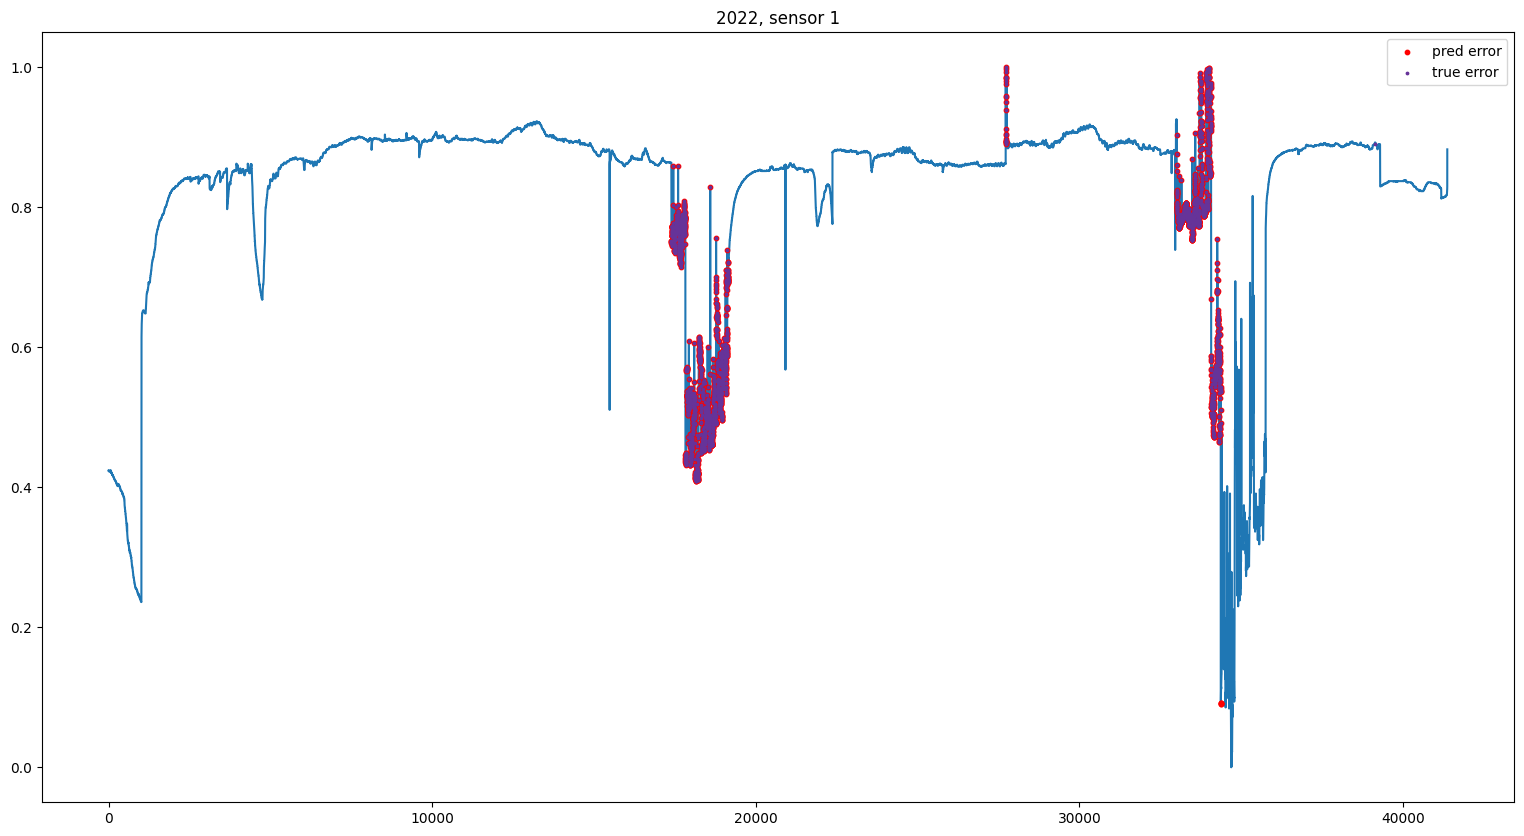

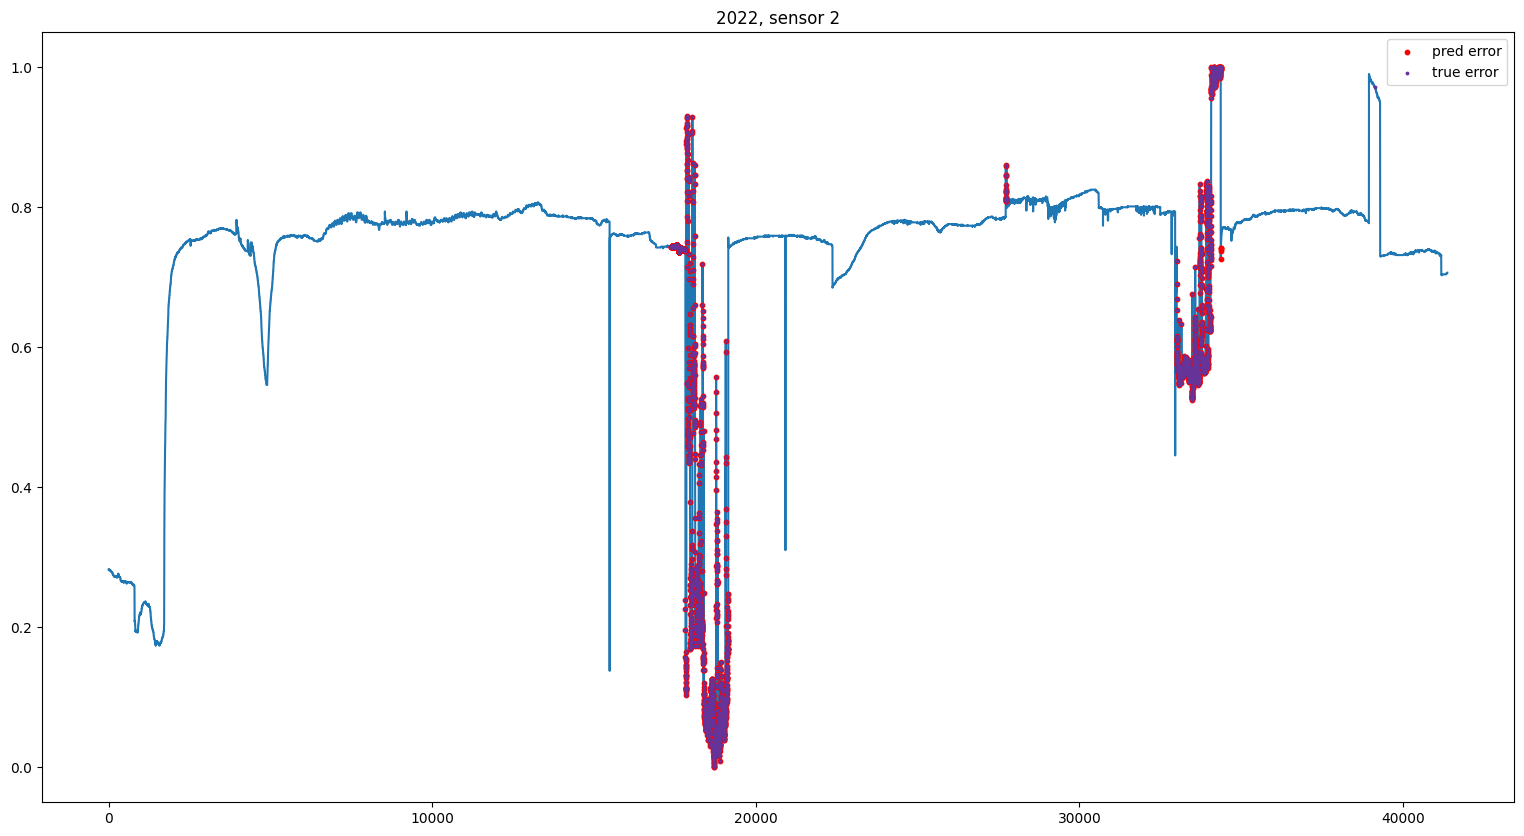

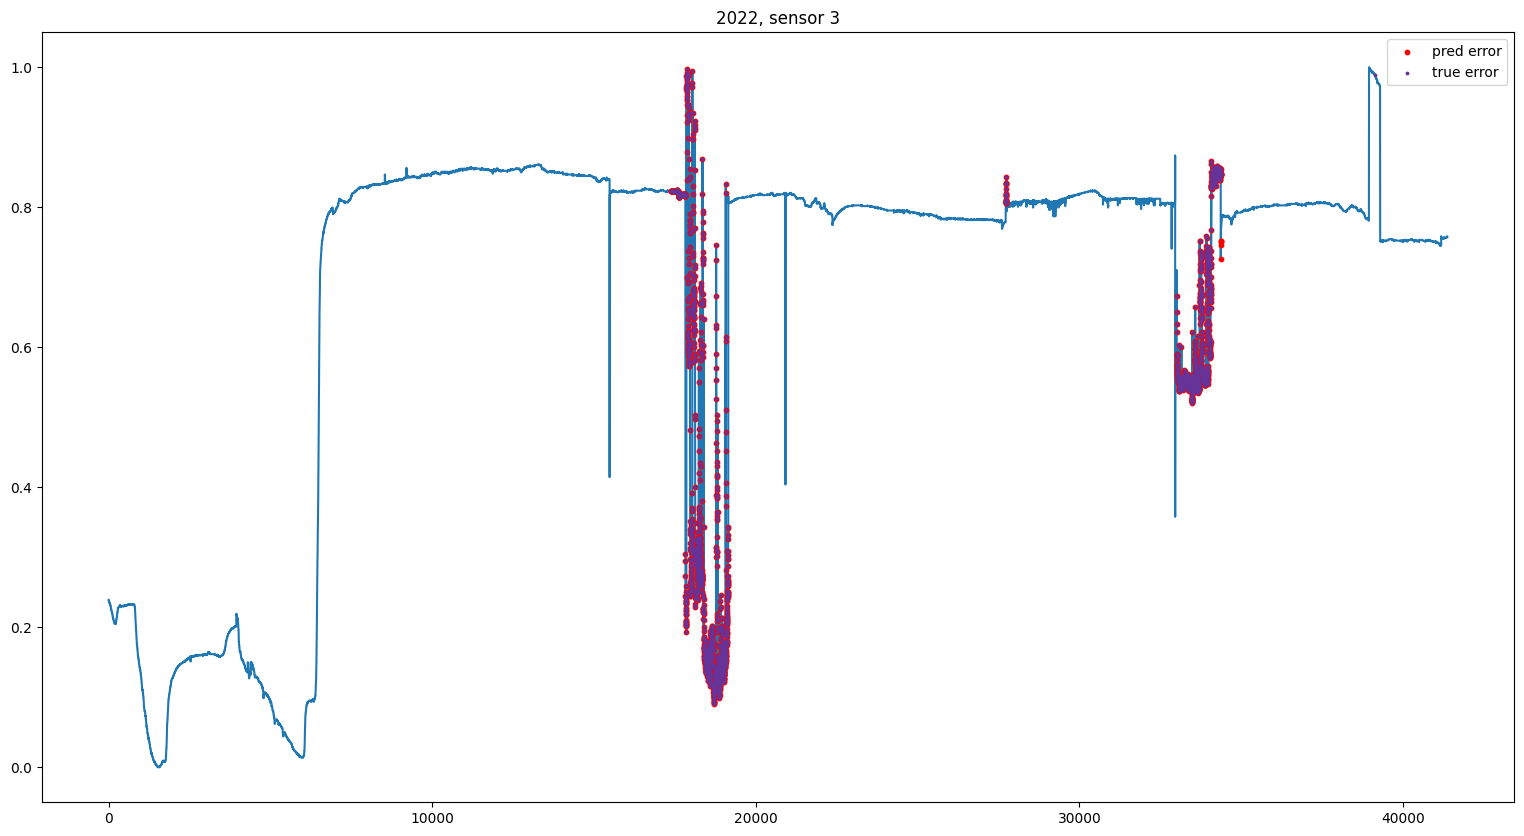

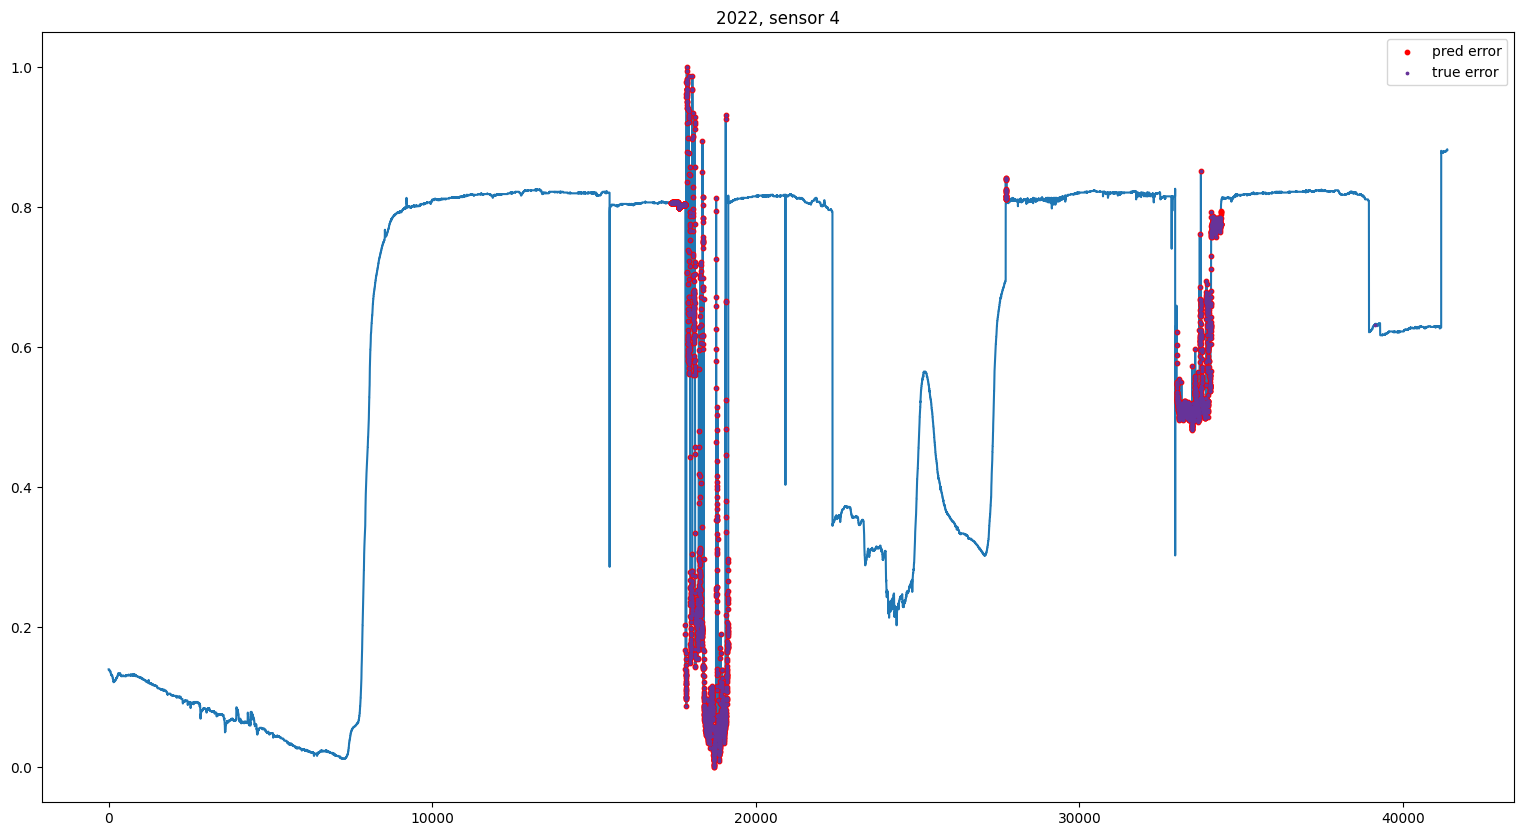

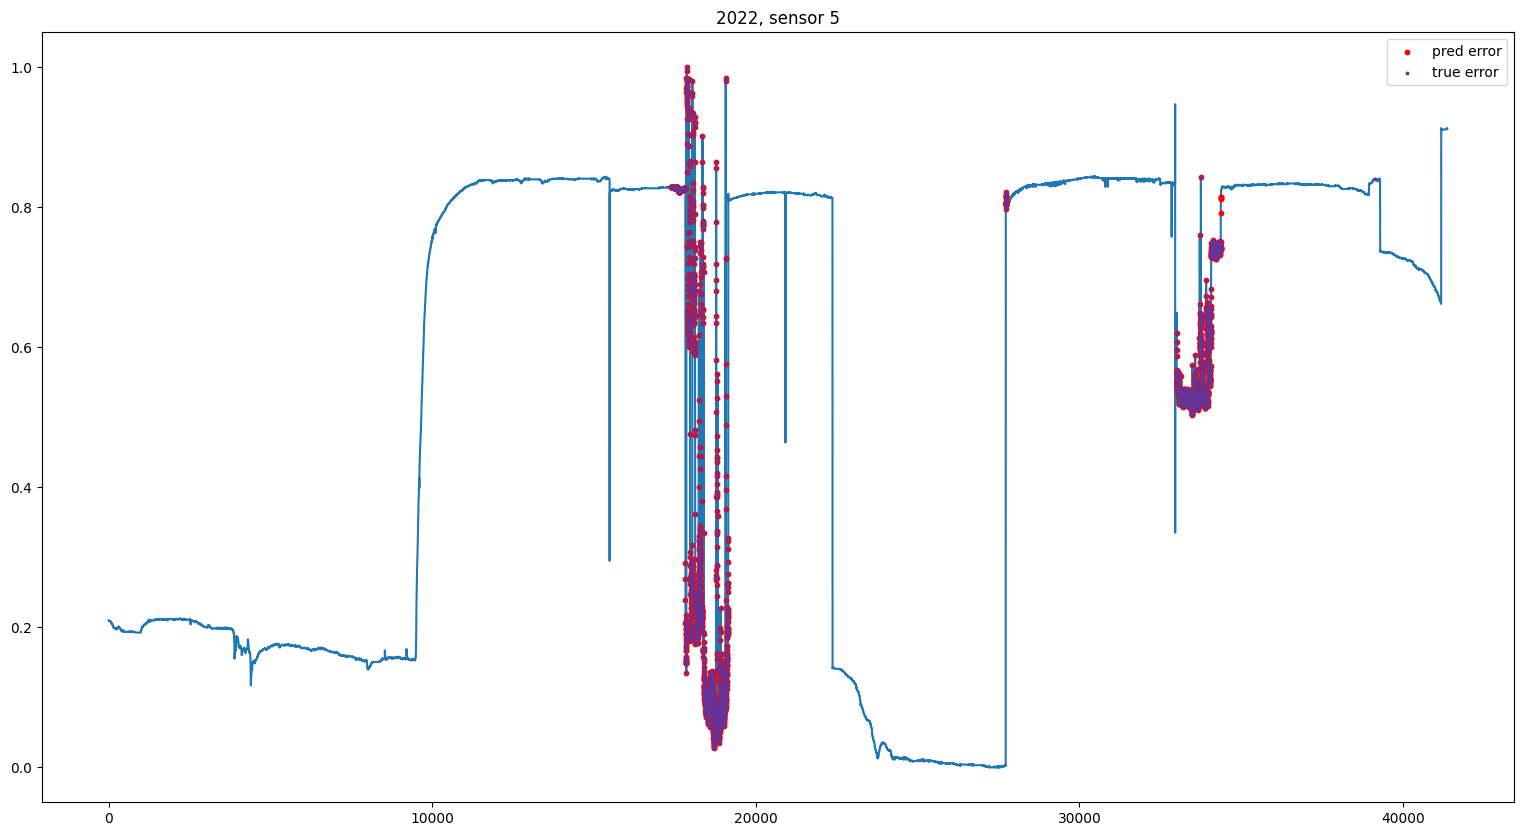

In [30]:

for i in range(1,6):
    plt.figure(figsize=(19,10))
    plt.plot(range(len(X_test_r)),X_test_r[f'Redox_Avg({i})'])
    plt.scatter(np.array(range(len(X_test_r)))[predar==True],X_test_r[f'Redox_Avg({i})'][predar==True],color='r',s=10,zorder=2,label='pred error')
    plt.scatter(np.array(range(len(X_test_r)))[y_test==True],X_test_r[f'Redox_Avg({i})'][y_test==True],color='rebeccapurple',s=3,zorder=3,label='true error')
    plt.title(f'2022, sensor {i}')
    plt.legend()
    plt.show()

# 2023 predictions

In [8]:
pred =model.predict(test)

predar = np.array(pred,dtype='bool')

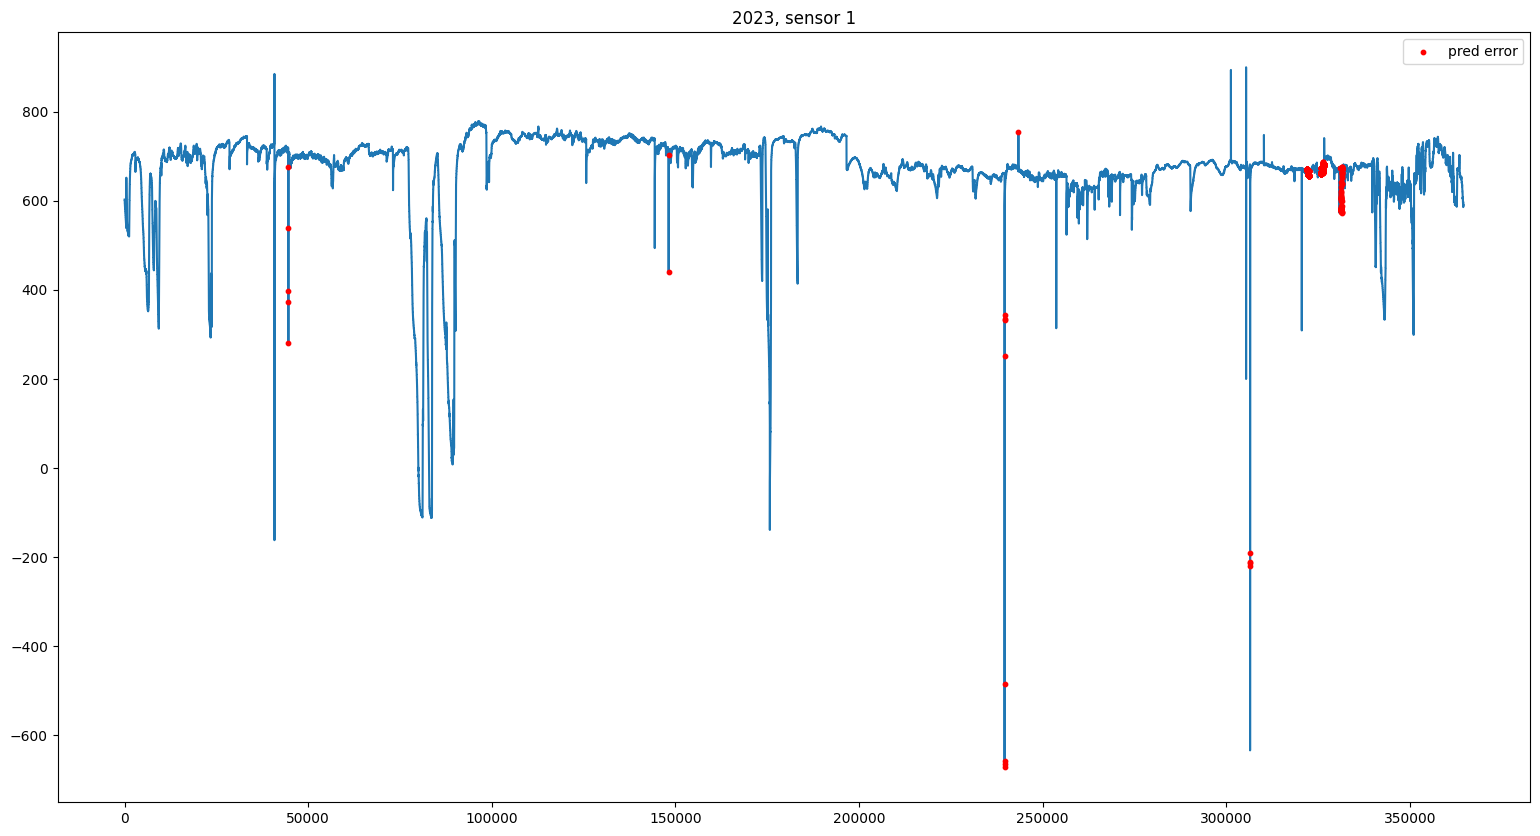

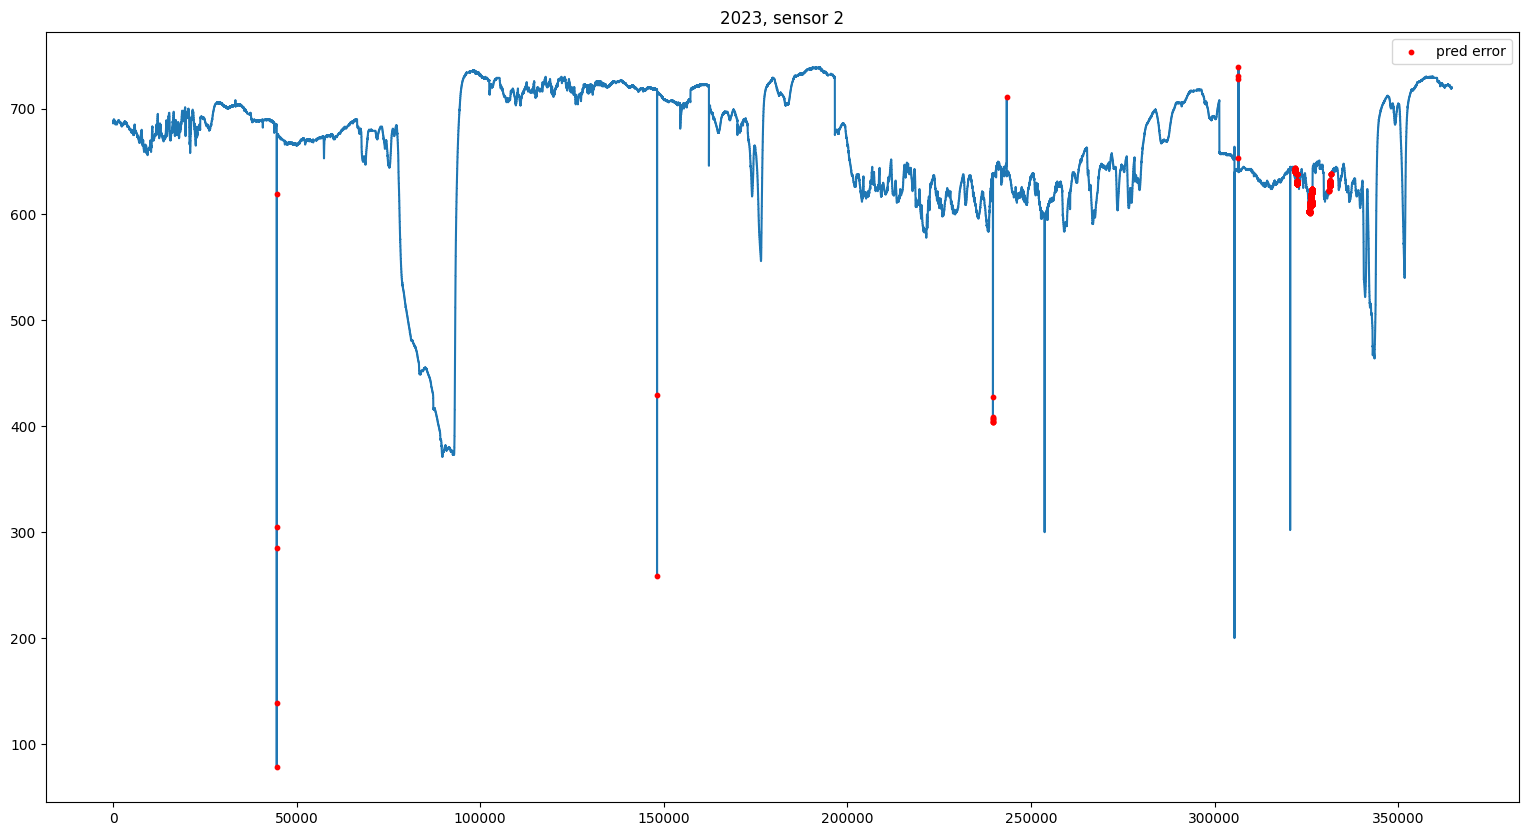

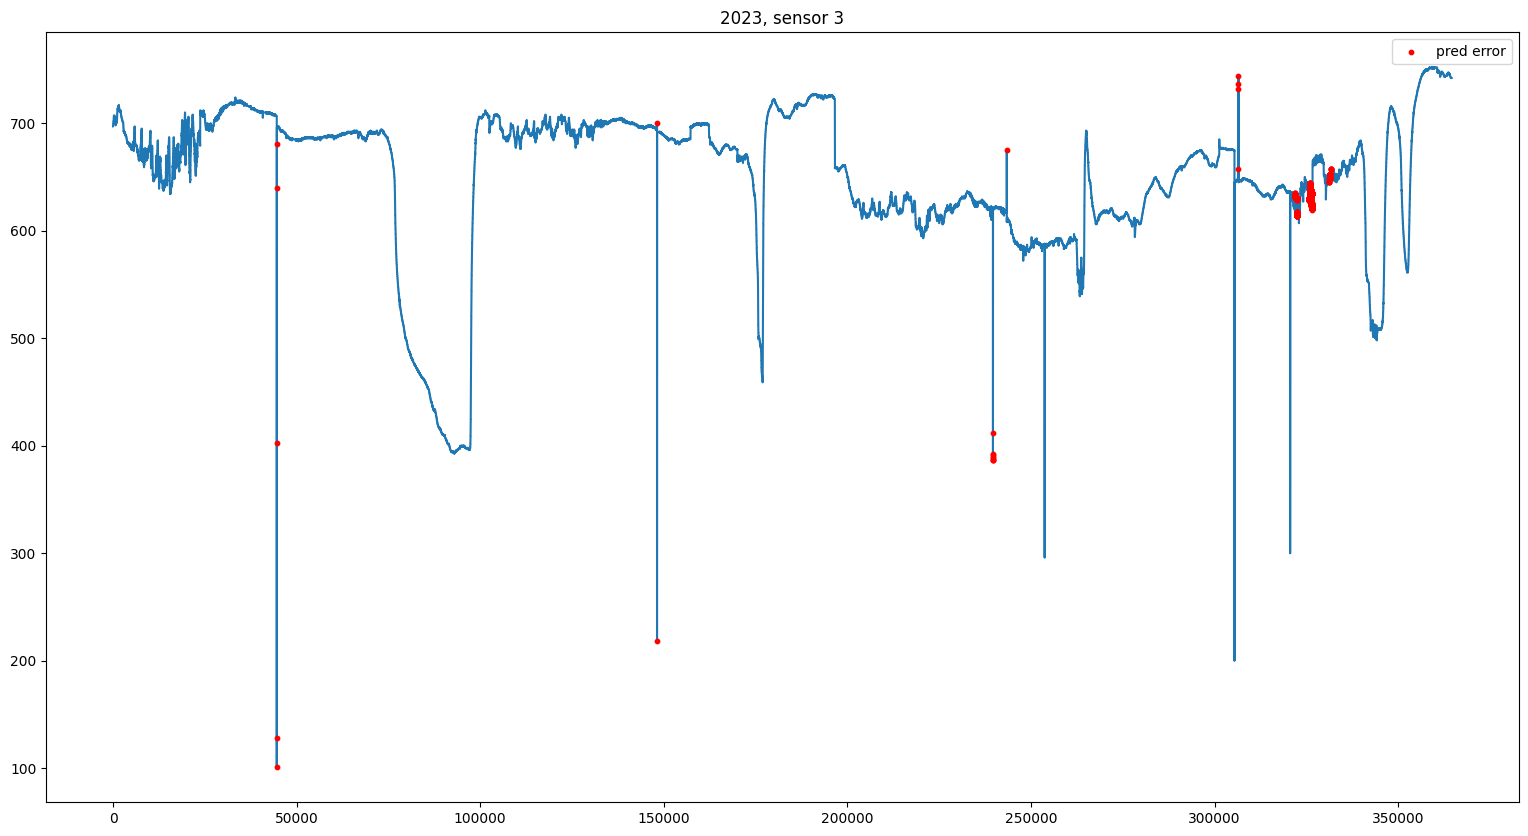

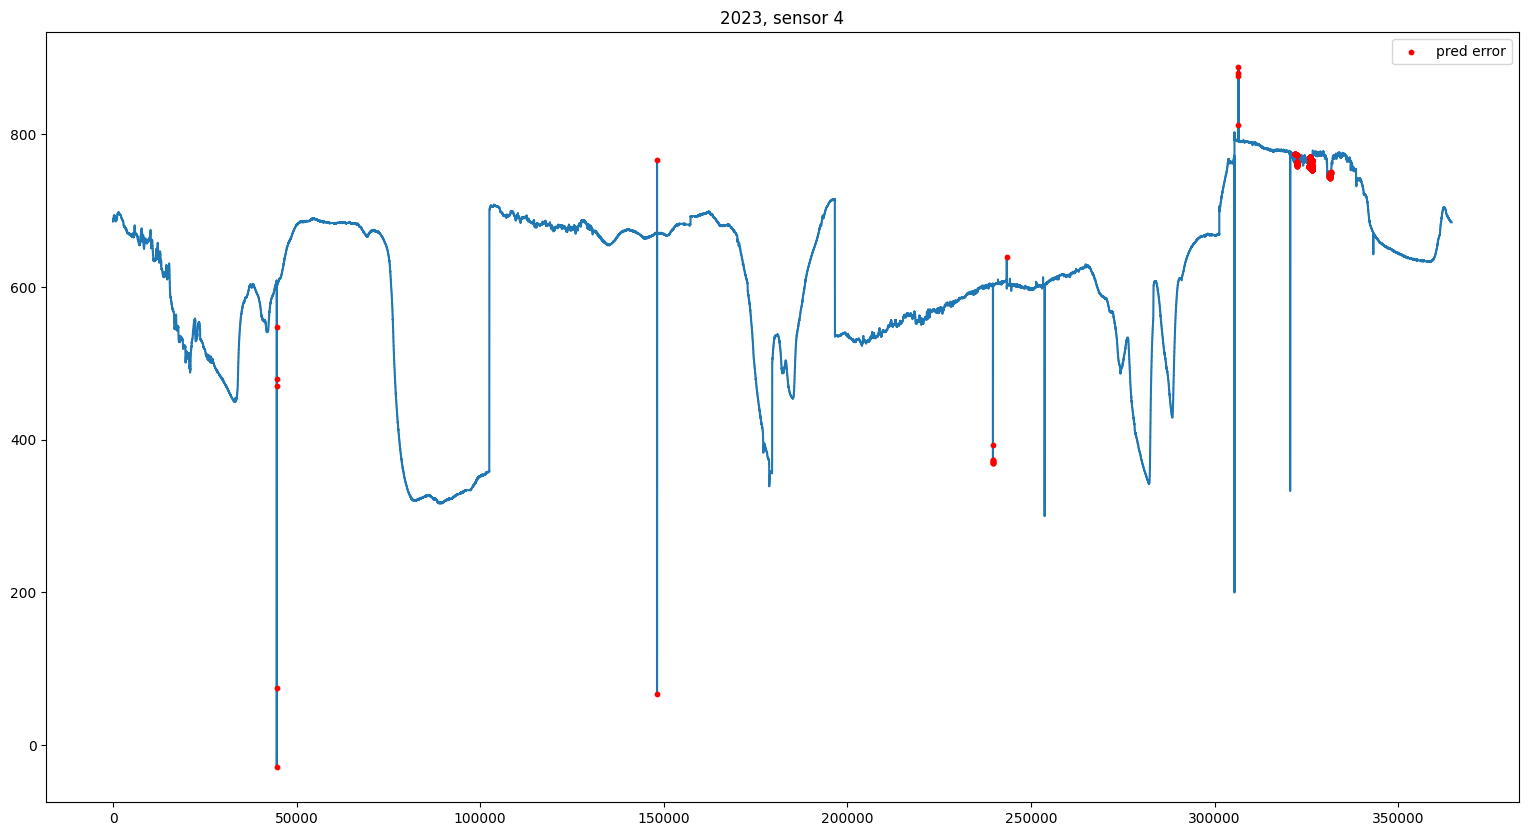

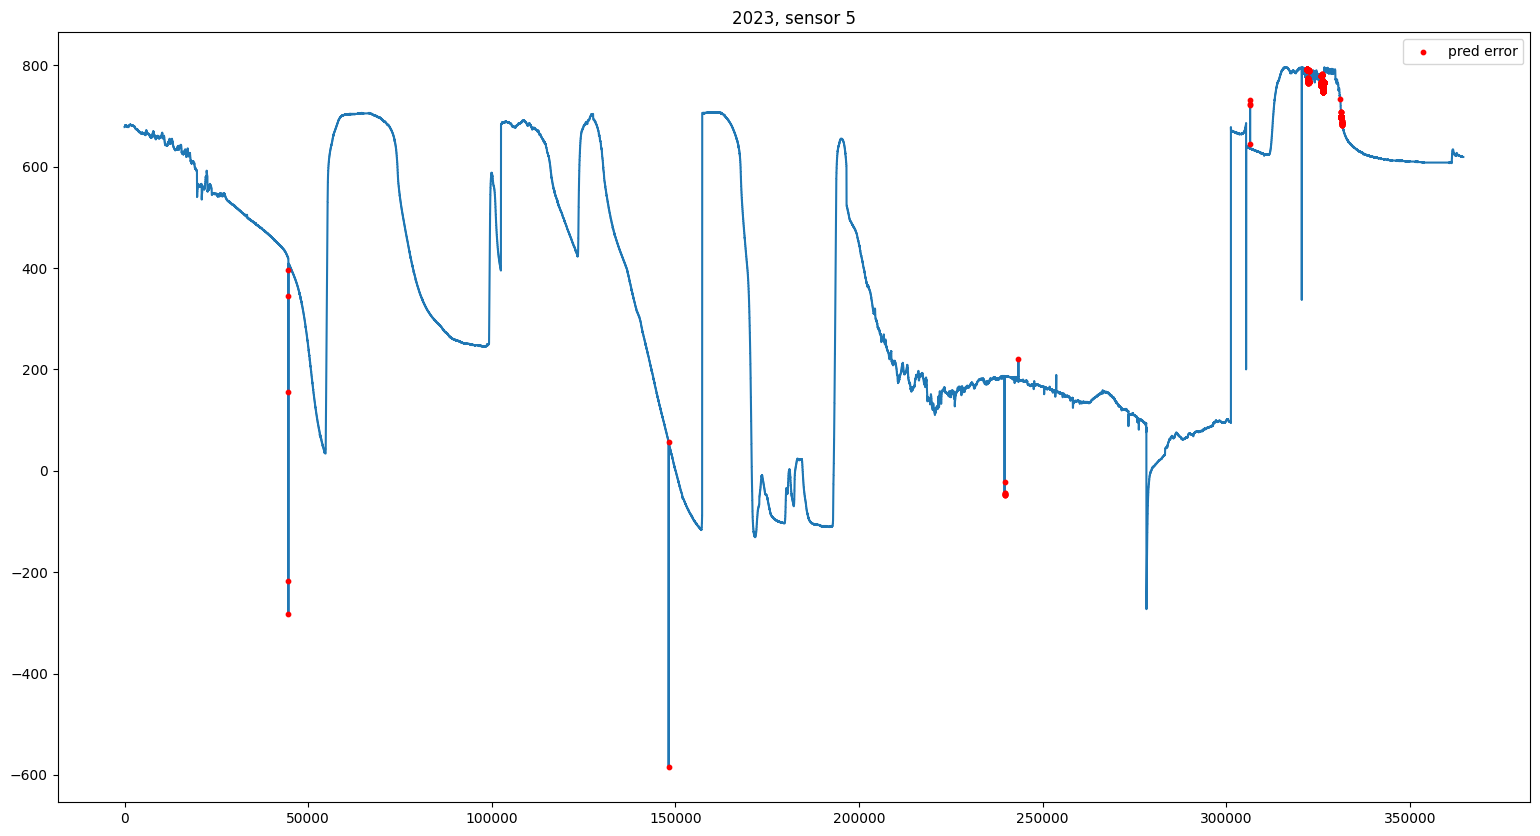

In [15]:
for i in range(1,6):
    plt.figure(figsize=(19,10))
    plt.plot(range(len(test)),test_r_noscale[f'Redox_Avg({i})'])
    plt.scatter(np.array(range(len(test)))[predar==True],test_r_noscale[f'Redox_Avg({i})'][predar==True],color='r',s=10,zorder=2,label='pred error')
#plt.scatter(np.array(range(len(X_test)))[y_test['Redox_error_flag']==True],true_err[y_test['Redox_error_flag']==True],color='rebeccapurple',s=3,zorder=3)
    plt.title(f'2023, sensor {i}')
    plt.legend()
    plt.show()